# What is the True Normal Human Body Temperature? (*solution*)

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

## Preliminary Visual Inspection
Becoming familiar with the data:

In [1]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

print('>>> Shape =', df.shape)
display(df.head(5))    
print('\n>>> Types\n', df.dtypes)

>>> Shape = (130, 3)


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0



>>> Types
 temperature    float64
gender          object
heart_rate     float64
dtype: object


### Plotting categorical data:

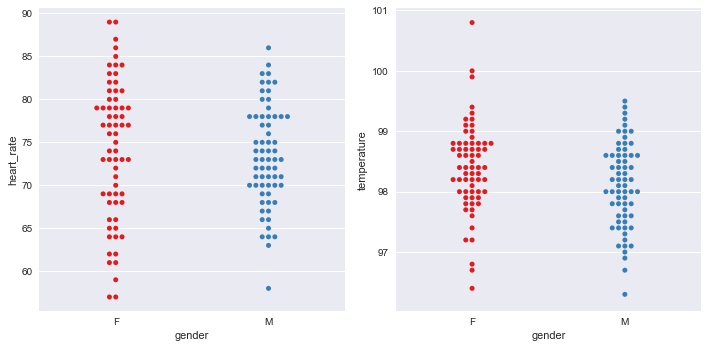

In [2]:
# initialize seaborn style for matplotlib
sns.set() 
fig, ax = plt.subplots(figsize=(10,5))

plt.subplot(1, 2, 1)
sns.swarmplot(x="gender", y="heart_rate", data=df, palette="Set1");

plt.subplot(1, 2, 2)
sns.swarmplot(x="gender", y="temperature", data=df, palette="Set1");

plt.tight_layout()
plt.show()

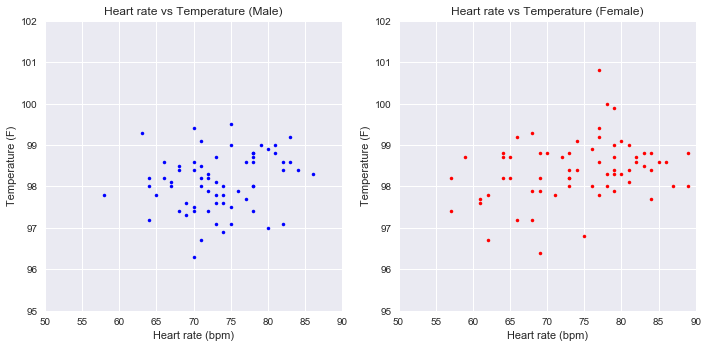

In [3]:
male_df = df.loc[df.gender == 'M']
female_df = df.loc[df.gender == 'F']

fig, ax = plt.subplots(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(male_df.heart_rate, male_df.temperature, marker='.', linestyle='none', color='blue')
plt.title('Heart rate vs Temperature (Male)')
plt.xlabel('Heart rate (bpm)')
plt.ylabel('Temperature (F)')
plt.axis((50, 90, 95, 102))

plt.subplot(1, 2, 2)
plt.plot(female_df.heart_rate, female_df.temperature, marker='.', linestyle='none', color='red')
plt.title('Heart rate vs Temperature (Female)')
plt.xlabel('Heart rate (bpm)')
plt.ylabel('Temperature (F)')
plt.axis((50, 90, 95, 102))

plt.tight_layout()
plt.show()

---
## 1. Is the distribution of body temperatures normal?

Yes, the theoretical CDF and the ECDF of the data (ploted below) suggest that the body temperatures are **normally distributed**.

In [4]:
### ecdf(): returns a one-dimensional array of measurements
def ecdf(data):       
    n = len(data)                # number of data points: n
    x = np.sort(data)            # x-data for the ECDF: x    
    y = np.arange(1, n+1/n) / n  # y-data for the ECDF: y
    return x, y

In [5]:
### Compute summary statistics
mean    = np.mean(df.temperature) 
std     = np.std(df.temperature) 

>>> mean    = 98.24923076923078
>>> std dev = 0.7303577789050377
>>> derived samples = 5000


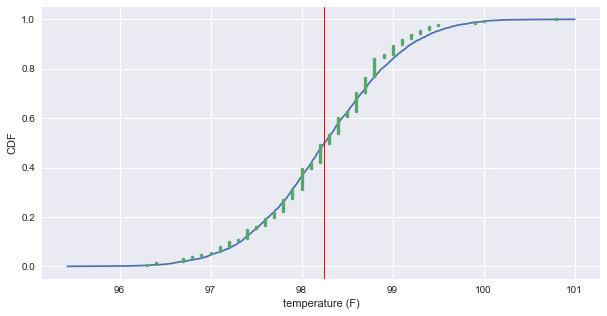

In [6]:
### Simulate a larger dataset with the same mean and std deviation to plot ECDF and later PDF
samples = np.random.normal(mean, std, size=5000) 
x, y    = ecdf(df.temperature) 
x_theor, y_theor = ecdf(samples) 

print('>>> mean    =', mean)
print('>>> std dev =', std)
print('>>> derived samples =', len(samples))

### Plot ECDF
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(x_theor, y_theor) 
plt.plot(x, y, marker='.', linestyle='none') 
plt.axvline(mean, color='r', linewidth=1)
plt.xlabel('temperature (F)') 
plt.ylabel('CDF') 
plt.show() 

>>> mean    = 98.24923076923078
>>> std dev = 0.7303577789050377
>>> derived samples = 5000


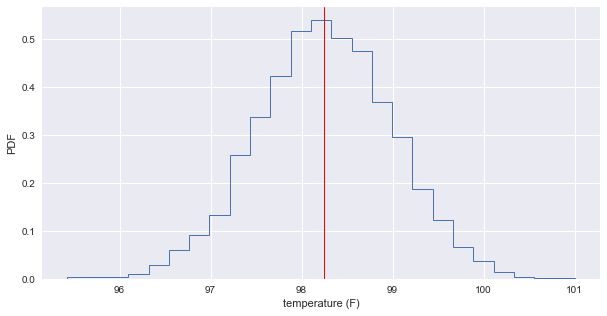

In [7]:
print('>>> mean    =', mean)
print('>>> std dev =', std)
print('>>> derived samples =', len(samples))

### Plot PDF
fig, ax = plt.subplots(figsize=(10,5))
result = plt.hist(samples, bins=25, normed=True, histtype='step', linewidth=1)
plt.axvline(mean, color='r', linewidth=1)

plt.xlabel('temperature (F)')
plt.ylabel('PDF')
plt.show()

In a normal distribution, the **mean** and the **median** have always the same value. In this particular case, they are so close to each other that I believe we can say that it is a normal distribution.

In [8]:
print('>>> mean    = %.3f' % np.mean(df.temperature))
print('>>> median  = %.3f' % np.median(df.temperature))

>>> mean    = 98.249
>>> median  = 98.300


On the other hand, in a *perfectly symmetrical bell curve*, the **mean**, **median** and **mode** are all the same value. However, this is not the case with the distribution of body temperatures. Even though the mean and median are relatively close values, the mode is not:

In [9]:
import scipy
print('>>> mode    = %.3f' % scipy.stats.mode(df.temperature)[0][0])

>>> mode    = 98.000


Another confirmation of the normal distribution comes from the **Shapiro-Wilk** normality test. It provides a good evidence that for these 5000 samples the null hypothesis is true: it is a normal distribution.

In [10]:
print(scipy.stats.shapiro(df.temperature)) # Outputs: (statistic test, p-value)

(0.9865769743919373, 0.2331680953502655)


---
## 2. Is the sample size large? Are the observations independent?

**No**, sample size has only 130 observations. This means that each new sample added to the set is likely to have a greater impact on the mean than if the sample size had 5000 samples, for instance.

In [11]:
print('>>> Original sample size =', df.shape[0])

>>> Original sample size = 130


Two observations are said to be **independent** if the occurrence of one provides no information about the occurrence of the other. As far as we can tell from the exercise and searching online about Carl Wunderlich's work, these observations weren't made on the same person (over time) Therefore, it makes sense to assume **they are independent observations**, probably gathered from hospital patients were he was a physician.

## 3. Is the true population mean really 98.6 degrees F?

Actually, the original dataset provided for this exercise has a population mean of **98.2 F**. 

For this reason, from now on the value we are testing for is 98.2, not 98.6!

In [12]:
print('>>> mean    = %.1f' % np.mean(df.temperature))

>>> mean    = 98.2


* **First, a bootstrap hypothesis test:**

In [13]:
# Generates boostrap replicates for N tests
def gen_bootstrap_replicates(data, n, func):
    bs_replicates = np.empty(n)
    
    for i in range(n):
        bs_sample = np.random.choice(data, size=len(data))
        bs_replicates[i] = func(bs_sample) # apply the 
        
    return bs_replicates

>>> Bootstrap replicates (mean) = 98.25


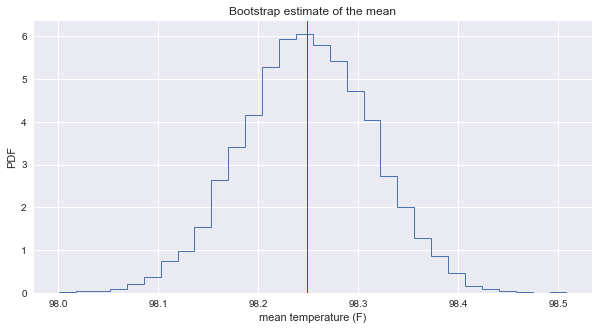

In [14]:
### Compute the approximate PDF of the mean temperature we would expect
### if we performed the measurements again.
###
bs_replicates_mean = gen_bootstrap_replicates(df.temperature, 10000, np.mean)
#print(bs_replicates_mean[:5]) # print head

bs_rep_mean = np.mean(bs_replicates_mean)
print('>>> Bootstrap replicates (mean) = %.2f' % bs_rep_mean)

### Plot PDF
fig, ax = plt.subplots(figsize=(10,5))
plt.hist(bs_replicates_mean, bins=30, normed = True, histtype='step', linewidth=1)
plt.axvline(bs_rep_mean, color='r', linewidth=1)
plt.title('Bootstrap estimate of the mean')
plt.xlabel('mean temperature (F)')
plt.ylabel('PDF')
plt.show()

To summarise this graphical result, we compute the 95% confidence interval of the means:

In [15]:
# if we repeated measurements over and over again, p% of the observed values would stay within the p% confidence interval
print('>>> Bootstrap confidence intervals: ', np.percentile(bs_replicates_mean, [2.5, 97.5]))

>>> Bootstrap confidence intervals:  [ 98.11921154  98.37538462]


**Hypothesis test**: is the population mean of the bootstrap replicates really the same as in the original dataset?

Comparing the mean of the simulated data and the observed data makes it possible to see that there is just a minimal difference between them, confirming that the mean of the temperatures is really 98.2 (F).

Plus, the high value of the *p-value* shows that there was a significant amount of simulated tests that resulted in the exact same mean as the original dataset.

In [16]:
# Test statistic: single number computed from the (original) observed data and from the simulated data under 
# the null hypothesis. It serves as a basis of comparison between the two! In this case, our test statistic 
# is the mean and difference between the observed mean and simulated mean.
# It should be zero for the hypothesis to be true:
diff_means = np.mean(df.temperature) - np.mean(bs_replicates_mean)
print('>>> Difference of the means of actually observed data vs simulated data: %.4f' % np.abs(diff_means))

# Compute fraction of replicates that have the same mean as the observed Temperature mean: p
p = np.sum(bs_replicates_mean == np.mean(df.temperature)) / len(bs_replicates_mean)
print('>>> p-value = ', p)
print('>>> %.1f percent of the bootstrap replicates had the exact same mean as the original dataset.' % (p * 10000))

>>> Difference of the means of actually observed data vs simulated data: 0.0000
>>> p-value =  0.0019
>>> 19.0 percent of the bootstrap replicates had the exact same mean as the original dataset.


* **Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?**

A *one-sample test* would be used if I needed to compare a dataset against a single number (a.k.a test statistic) from another dataset that I don't have access to.

The *two-sample test* would be used if I needed to compare two sets of data.

In [17]:
# TODO

* **In this situation, is it appropriate to use the $t$ or $z$ statistic?**

The **t** statistic is used when you have a small sample size or if you don’t know anything about the population. In this case, since we know the mean, median, mode and std deviation, using a **z** statistic makes more sense.

* **Now try using the other test. How is the result be different? Why?**

In [18]:
# TODO

## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests

In [19]:
# TODO

## 5. At what temperature should we consider someone's temperature to be "abnormal"?

In [20]:
# TODO

## 6. Is there a significant difference between males and females in normal temperature?

In [21]:
# TODO